# Regression(Lesson 2)
## Multiple Linear Regression(MLR)

### First of all import needed packages

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
# Use this to show matplotlib and plots properly in notebook(But no essential)
%matplotlib inline

### Read the csv(Comma seperated value) file with pandas

In [3]:
Data_Frame = pd.read_csv('Fuel_Consumption.csv')

In [4]:
Data_Frame.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [48]:
# extract features which you want to use
Clear_Data_Frame = Data_Frame[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [8]:
Clear_Data_Frame.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


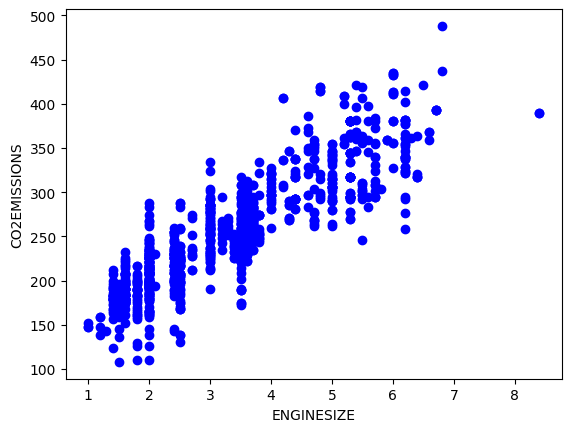

In [49]:
plt.scatter(Clear_Data_Frame.ENGINESIZE,Clear_Data_Frame.CO2EMISSIONS,
           color = 'blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [51]:
Mask = np.random.rand(len(Data_Frame)) < 0.8
Train = Clear_Data_Frame[Mask]
Test = Clear_Data_Frame[~Mask]

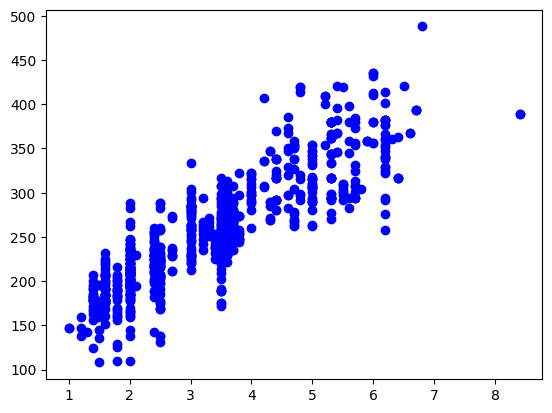

In [52]:
plt.scatter(Train.ENGINESIZE,Train.CO2EMISSIONS,color = 'blue')

### Create and run your model

In [58]:
from sklearn import linear_model
Regression = linear_model.LinearRegression()
# x and y are x-train and y-train
x = np.asanyarray(Train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(Train[['CO2EMISSIONS']])
Regression.fit(x,y)
# print co-efficients and intercept
print('Co-efficient1(for engine size) : ',Regression.coef_[0][0])
print('Co-efficient2(for cylinders) : ',Regression.coef_[0][1])
print('Co-efficient3(for fuel consumption_comb) : ',Regression.coef_[0][2])
print('Intercept : ',Regression.intercept_[0])

Co-efficient1(for engine size) :  11.096387160838635
Co-efficient2(for cylinders) :  6.965910902455523
Co-efficient3(for fuel consumption_comb) :  9.887518721298363
Intercept :  64.52219053202037


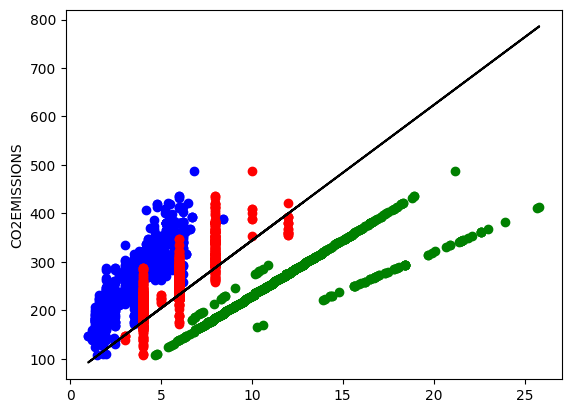

The line equation is : y = 11.096387160838635x1 + 6.965910902455523x2 + 9.887518721298363x3 + 64.52219053202037

x1 is ENGINESIZE

x2 is CYLINDERS

x3 is FUELCONSUMPTION_COMB


In [64]:
plt.scatter(Train.ENGINESIZE,Train.CO2EMISSIONS,color = 'blue')
plt.scatter(Train.CYLINDERS,Train.CO2EMISSIONS,color = 'red')
plt.scatter(Train.FUELCONSUMPTION_COMB,Train.CO2EMISSIONS,color = 'green')
plt.plot(x,Regression.coef_[0][0]*x + Regression.coef_[0][1]*x + Regression.coef_[0][2]*x + Regression.intercept_[0],'black')
plt.ylabel('CO2EMISSIONS')
plt.show()
print(f'The line equation is : y = {Regression.coef_[0][0]}x1 + {Regression.coef_[0][1]}x2 + {Regression.coef_[0][2]}x3 + {Regression.intercept_[0]}\n')
print('x1 is ENGINESIZE\n\nx2 is CYLINDERS\n\nx3 is FUELCONSUMPTION_COMB')

In [65]:
# Convert test data into numpy array
Test_x = np.asanyarray(Test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
# Real value
Test_y = np.asanyarray(Test[['CO2EMISSIONS']])
Predicted_y = Regression.predict(Test_x)
print('Residual sum of mean squares(MSE) : %.2f'% np.mean((Predicted_y - Test_y)**2))
# the closer Variance is to 1 , the better it is
print('Variance score : %.2f ' % Regression.score(Test_x,Test_y))

Residual sum of mean squares(MSE) : 596.50
Variance score : 0.85 
